In [2]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

from sklearn.multioutput import MultiOutputClassifier

In [3]:
trg_file = 'subset_train_expanded.csv'
tst_file = 'subset_test_expanded.csv'
val_file = 'subset_valid_expanded.csv'

In [4]:
#Loading training subset of dataset
trg_ds = pd.read_csv(trg_file)
tst_ds = pd.read_csv(tst_file)
val_ds = pd.read_csv(val_file)

In [5]:
#Lists identifying the numerical features and labels
#num_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
features = ['Type','Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']
tgts = ['Machine failure','TWF','HDF','PWF','OSF','RNF']

In [6]:
#Feature vector and labels for training data.
#X_trg = trg_ds[num_features]
X_trg = trg_ds[features]
#y_trg = trg_ds['Machine failure']
y_trg = trg_ds[tgts]

#Feature vector and labels for test data
#X_tst = tst_ds[num_features]
X_tst = tst_ds[features]
#y_tst = tst_ds['Machine failure']
y_tst = tst_ds[tgts]


#X_val = val_ds[num_features]
X_val = val_ds[features]
#y_val = val_ds['Machine failure']
y_val = val_ds[tgts]

###############################
#Finding categorical variables (Here it's only "Type")
s = (X_trg.dtypes == 'object')
object_cols = list(s[s].index)

#print("Categorical variables:")
#print(object_cols)

# Apply ordinal encoder to object columns
ordinal_encoder = OrdinalEncoder()

X_trg[object_cols] = ordinal_encoder.fit_transform(X_trg[object_cols])
X_tst[object_cols] = ordinal_encoder.transform(X_tst[object_cols])
X_val[object_cols] = ordinal_encoder.transform(X_val[object_cols])

#y_trg.head()
#X_trg.head()

C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [102]:
clf_linSVM = svm.SVC(kernel='linear', C = 0.01)

# Make it an Multilabel classifier
multilabel_linSVM_clf = MultiOutputClassifier(clf_linSVM, n_jobs=-1)

In [103]:
#clf_linSVM.fit(X_trg, y_trg)

# Fit the data to the Multilabel classifier
multilabel_linSVM_clf = multilabel_linSVM_clf.fit(X_trg, y_trg)

In [104]:
# Get predictions for test data
y_tst_pred = multilabel_linSVM_clf.predict(X_tst)
y_tst_pred = pd.DataFrame(y_tst_pred, columns = ['Machine failure','TWF','HDF','PWF','OSF','RNF'])

# Generate multiclass confusion matrices
matrices = multilabel_confusion_matrix(y_tst, y_tst_pred)

#linSVM_acc_train = clf_linSVM.score(X_trg, y_trg)
#print("Linear SVM Training Set Accuracy:", linSVM_acc_train)
#y_tst
#y_tst_pred
#matrices

In [65]:
#linSVM_acc_test = clf_linSVM.score(X_tst, y_tst)
#print("Linear SVM Test Set Accuracy:", linSVM_acc_test)

In [66]:
#linSVM_acc_val = clf_linSVM.score(X_val, y_val)
#print("Linear SVM Validation Set Accuracy:", linSVM_acc_val)

In [105]:
#pred_y_tst = clf_linSVM.predict(X_tst)
#pred_y_val = clf_linSVM.predict(X_val)

#Classification report over test set
print(classification_report(y_tst, y_tst_pred, target_names=['Machine failure','TWF','HDF','PWF','OSF','RNF']))

                 precision    recall  f1-score   support

Machine failure       0.81      0.79      0.80       986
            TWF       0.67      0.20      0.31       145
            HDF       0.91      1.00      0.95       290
            PWF       0.98      1.00      0.99       261
            OSF       0.90      0.92      0.91       377
            RNF       0.00      0.00      0.00         0

      micro avg       0.87      0.83      0.85      2059
      macro avg       0.71      0.65      0.66      2059
   weighted avg       0.85      0.83      0.83      2059
    samples avg       0.45      0.40      0.42      2059



C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Behlol\miniconda3\envs\ML_PyTorch\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\

In [21]:
#Classification report over validation set
#print(classification_report(y_val, pred_y_val, target_names=['Not failed','Failed']))

In [22]:
#Classification report over test set
#cm_tst = confusion_matrix(y_tst, pred_y_tst)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm_tst)
#disp.plot()

In [23]:
#Classification report over validation set
#cm_val = confusion_matrix(y_val, pred_y_val)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
#disp.plot()

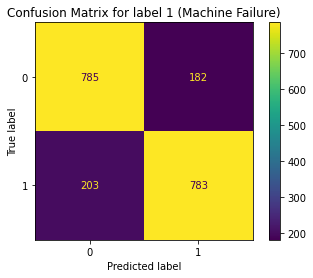

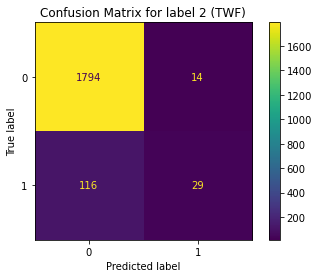

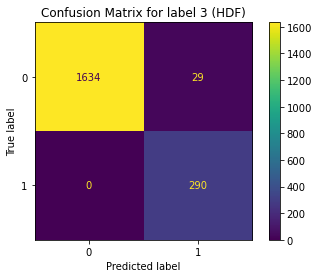

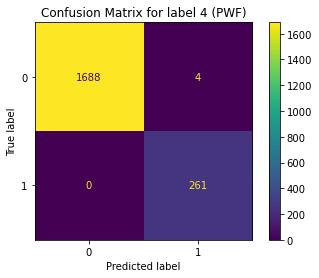

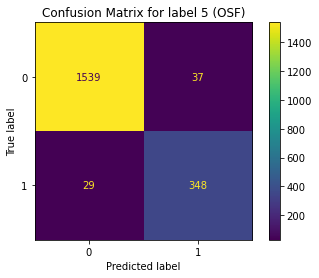

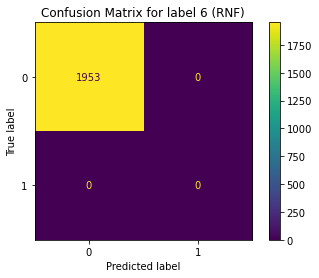

In [106]:
# Plotting matrices
cmd = ConfusionMatrixDisplay(matrices[0], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 1 (Machine Failure)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[1], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 2 (TWF)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[2], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 3 (HDF)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[3], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 4 (PWF)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[4], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 5 (OSF)')
plt.show()
cmd = ConfusionMatrixDisplay(matrices[5], display_labels=np.unique(y_tst)).plot()
plt.title('Confusion Matrix for label 6 (RNF)')
plt.show()

In [107]:
linSVM_acc_train = multilabel_linSVM_clf.score(X_trg, y_trg)
print("Linear SVM Training Set Accuracy:", linSVM_acc_train)

Linear SVM Training Set Accuracy: 0.7738907224055739


In [108]:
linSVM_acc_test = multilabel_linSVM_clf.score(X_tst, y_tst)
print("Linear SVM Test Set Accuracy:", linSVM_acc_test)

Linear SVM Test Set Accuracy: 0.7465437788018433


In [109]:
linSVM_acc_val = multilabel_linSVM_clf.score(X_val, y_val)
print("Linear SVM Validation Set Accuracy:", linSVM_acc_val)

Linear SVM Validation Set Accuracy: 0.7482069672131147
